# What's cooking? - Data Science class project 

This project is about __predicting__ the type of cuisine from a list of ingredients. In this notebook, we, as a team, process and analyze the dataset to train a machine learning model to make predictions

Participants:
- Daniel Felipe Barrera Suarez - 
- Andres Juian Vargas Medina - 
- Santiago Reyes Gomez - 20221020098


In [20]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

from typing import List

## Exploring, Processing and Cleanin the data

### Collecting the data

In [21]:
train_df = pd.read_json('assets/train.json')

### Understanding data


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [23]:
print('shape:', train_df.shape)
print('id column is unique?:', train_df['id'].is_unique)

shape: (39774, 3)
id column is unique?: True


### Missing values


In [24]:
train_df.isna().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

### Cleaning data


In [27]:
def cleaning(list: List) -> List:
    indexes_to_remove = []
    for i in range(len(list)):
        if re.search(r'\s*\(.*oz\.\)\s*', list[i]):
            d = re.sub(r'\s*\(.*oz\.\)\s*', '', list[i])
            list[i] = d

        if len(list[i]) <= 2:
            indexes_to_remove.append(i)

        
        if re.findall(r'\d+\s*', list[i]):
            d = re.sub(r'\d+\s*', '', list[i])
            if list[i].lower() == '7 up':
                continue
            list[i] = d
        
        for word in list[i].split():
            if len(word) <= 2:
                print(list[i])

    for i in indexes_to_remove:
            list.pop(i)
        
    return list

        
train_df['ingredients'] = train_df['ingredients'].apply(cleaning)
# train_df.to_csv('ingr.csv')

lo mein noodles
% low-fat milk
ras el hanout
% reduced-fat milk
chipotles in adobo
condensed cream of mushroom soup
condensed cream of chicken soup
cream of chicken soup
Old El Paso Flour Tortillas
cream of tartar
eau de vie
condensed cream of chicken soup
pico de gallo
% reduced-fat milk
bone in chicken thighs
cream of tartar
chipotles in adobo
chipotles in adobo
half & half
half & half
leg of lamb
Old El Paso™ mild red enchilada sauce
sun-dried tomatoes in oil
hearts of palm
lo mein noodles
condensed cream of mushroom soup
cream of chicken soup
leg of lamb
condensed cream of chicken soup
bone in skinless chicken thigh
condensed cream of chicken soup
chipotles in adobo
half & half
pico de gallo
cream of tartar
% low-fat cottage cheese
cream of mushroom soup
bone in chicken thighs
half & half
Old El Paso Flour Tortillas
Campbell's Condensed Cream of Chicken Soup
diced tomatoes in juice
% low-fat milk
half & half
diced tomatoes in juice
hearts of palm
% low-fat milk
half & half
chipotle

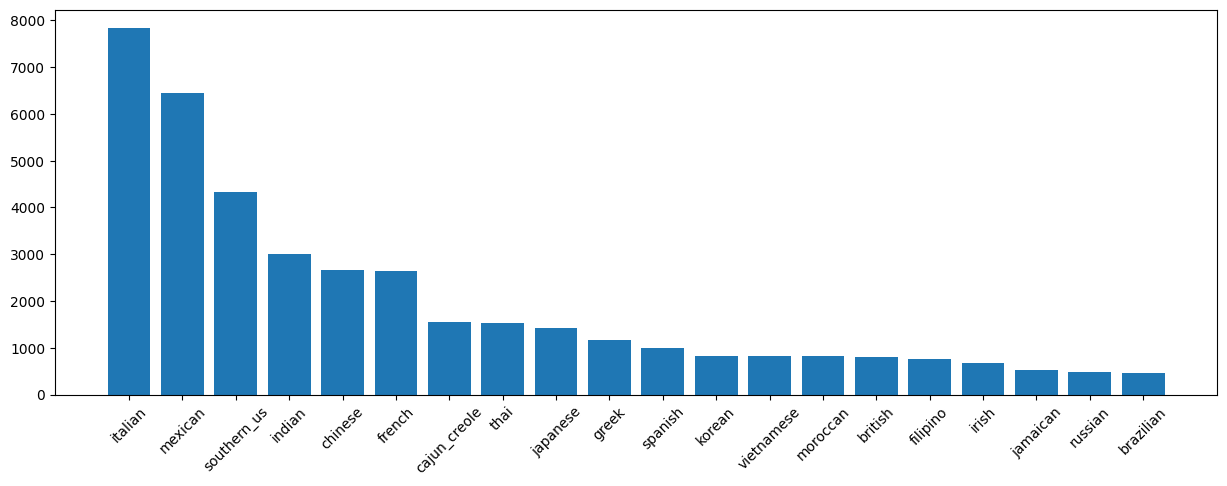

In [28]:
fig = plt.figure(figsize=(15, 5))

cousine_categories = train_df['cuisine'].value_counts()

plt.bar(cousine_categories.index, cousine_categories.values)
plt.xticks(rotation=45)
plt.show()